<a href="https://colab.research.google.com/github/mmahyoub/prompt-engineering-workshop/blob/main/Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

> **Objective**: This workshop aims to equip you with the knowledge and skills needed to effectively communicate with large language models, enhancing your ability to generate high-quality outputs for various applications.





### LLMs

> **A large language model (LLM)** is a type of artificial intelligence algorithm that uses deep learning techniques and massively large datasets to understand, summarize, generate, and predict text.

> **LLM Key Characteristics:**

* **Size:** They are trained on huge datasets,
typically with billions of parameters.

* **Architecture:** Most modern LLMs use transformer neural network architectures.

* **Capabilities:** They can perform a variety of natural language processing (NLP) tasks like text generation, translation, summarization, and question answering.

* **Training:** They are pre-trained on vast amounts of text data using self-supervised learning.

* **Functionality:** LLMs work by analyzing patterns in language data to predict and generate human-like text.

* **Applications:** They are used in various fields including content creation, coding assistance, chatbots, and more.

* **Examples:** Notable LLMs include GPT models (like GPT-3 and GPT-4), Google's Gemini, Meta's LLaMA, and others.




In [21]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
from huggingface_hub import login
from getpass import getpass

In [23]:
hf_token = getpass("Enter your Hugging Face token: ")

Enter your Hugging Face token: ··········


In [24]:
login(token = hf_token)

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful


> Base LLMs predict the next token (or word) given an input sequence (i.e, tokenized text).

Example: GPT 2

In [25]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load pre-trained model and tokenizer
model_name = "gpt2"
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

In [26]:
# What is the model architecture?
model

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

From [Attention is All You Need](https://arxiv.org/abs/1706.03762) Research Paper:
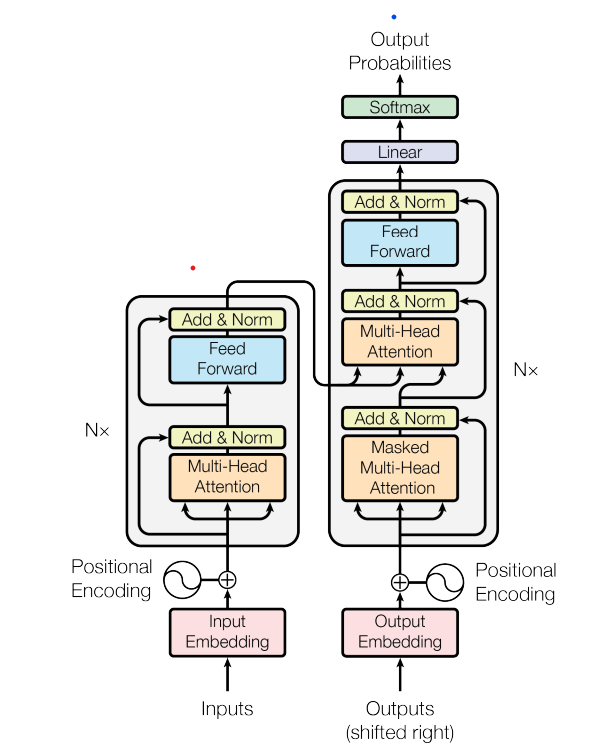

> You can check the 3Blue1Brown (a recommended YouTube channel) for a quick introduction to transformers. [Video Link](https://www.youtube.com/watch?v=wjZofJX0v4M)

In [27]:
# Input prompt
prompt = "Data science is"
print("Input:", prompt)
generated_text = []
# generate 10 tokens
for i in range(10):
  # Tokenize input prompt
  inputs = tokenizer(prompt, return_tensors="pt")

  # Generate next word predictions (with max_length controlling number of tokens to generate)
  outputs = model.generate(**inputs, max_length=len(inputs['input_ids'][0]) + 1, num_return_sequences=1)

  # Decode the predicted tokens
  predicted_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

  # Update prompt with new text
  prompt = predicted_text
  generated_text.append(predicted_text)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Input: Data science is


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [28]:
for text in generated_text:
  print(text)

Data science is a
Data science is a very
Data science is a very important
Data science is a very important part
Data science is a very important part of
Data science is a very important part of our
Data science is a very important part of our lives
Data science is a very important part of our lives.
Data science is a very important part of our lives. We
Data science is a very important part of our lives. We need


> Majority of pretrained LLMs are decoder only models. Meaning, they are next token predictors.

> **Note:** Base models are inherently next token prediction systems. Chat or instruct models are finetuned to respond effectively in a coherent manner to user input.